ASI - Automatic Sign In Model, @DataHack 2019

ASI can perform automatic login with machine learning based techniques. It learns the HTML structure of many banks, and when given a new login page it can find the necessary elements (username, password and submit button) to perform the login automatically.

In [1]:
from utils import *

Load Data

In [3]:
data = pd.read_csv('data/data_iteration3.csv',index_col=0)
data_df = data[list(data.columns.drop('LABEL'))+['LABEL']]
data_df.head(100)

,HTML_ID,TAG_NAME,ATTRIBUTE_ID,ATTRIBUTE_NAME,ATTRIBUTE_CLASS,ATTRIBUTE_PLACEHOLDER,IN_FORM,TAG_DEPTH,TAG_STRING,ATTRIBUTE_ARIALABELEDBY,ATTRIBUTE_ROLE,ATTRIBUTE_TYPE,ATTRIBUTE_VALUE,LOGIN_URL,LABEL
0,1,section,None,None,['container'],None,False,3,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
1,1,header,None,None,None,None,False,4,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
2,1,section,None,None,['logo'],None,False,5,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
3,1,a,None,None,['menu'],None,False,6,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
4,1,span,None,None,None,None,False,7,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
5,1,a,client_logo_public,client_logo_public,['logo-link'],None,False,6,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
6,1,span,None,None,['card-logo'],None,False,7,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
7,1,nav,None,None,None,None,False,5,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
8,1,ul,None,None,"['primary', 'navxml']",None,False,6,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
9,1,li,ac_home_nav,None,None,None,False,7,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0


Statistics

In [4]:
data_df.describe()

,HTML_ID,TAG_DEPTH,LABEL
count,3238.000000,3238.000000,3238.000000
mean,19.236566,11.179432,0.052193
std,10.963539,4.689452,0.348074
min,1.000000,3.000000,0.000000
25%,10.000000,8.000000,0.000000
50%,17.500000,11.000000,0.000000
75%,31.000000,13.000000,0.000000
max,36.000000,36.000000,3.000000


In [5]:
data_df['LABEL'].value_counts()

0    3154
3      31
1      30
2      23
Name: LABEL, dtype: int64

Feature Engineering

In [6]:
data_df.head()

,HTML_ID,TAG_NAME,ATTRIBUTE_ID,ATTRIBUTE_NAME,ATTRIBUTE_CLASS,ATTRIBUTE_PLACEHOLDER,IN_FORM,TAG_DEPTH,TAG_STRING,ATTRIBUTE_ARIALABELEDBY,ATTRIBUTE_ROLE,ATTRIBUTE_TYPE,ATTRIBUTE_VALUE,LOGIN_URL,LABEL
0,1,section,None,None,['container'],None,False,3,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
1,1,header,None,None,None,None,False,4,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
2,1,section,None,None,['logo'],None,False,5,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
3,1,a,None,None,['menu'],None,False,6,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0
4,1,span,None,None,None,None,False,7,NaN,None,None,None,None,https://d.comenity.net/victoriassecret/,0


In [7]:
features_to_manipulate_string_values = ['TAG_STRING','ATTRIBUTE_ID','ATTRIBUTE_NAME','ATTRIBUTE_PLACEHOLDER','TAG_STRING','ATTRIBUTE_ARIALABELEDBY','ATTRIBUTE_ROLE','ATTRIBUTE_VALUE','ATTRIBUTE_CLASS']

for feature in features_to_manipulate_string_values:
    data_df[feature] = data_df[feature].apply(lambda x: manipulate_string_values(x,False) if x is not None else np.nan)

data_df.head()

,HTML_ID,TAG_NAME,ATTRIBUTE_ID,ATTRIBUTE_NAME,ATTRIBUTE_CLASS,ATTRIBUTE_PLACEHOLDER,IN_FORM,TAG_DEPTH,TAG_STRING,ATTRIBUTE_ARIALABELEDBY,ATTRIBUTE_ROLE,ATTRIBUTE_TYPE,ATTRIBUTE_VALUE,LOGIN_URL,LABEL
0,1,section,none,none,container,none,False,3,nan,none,none,None,none,https://d.comenity.net/victoriassecret/,0
1,1,header,none,none,none,none,False,4,nan,none,none,None,none,https://d.comenity.net/victoriassecret/,0
2,1,section,none,none,logo,none,False,5,nan,none,none,None,none,https://d.comenity.net/victoriassecret/,0
3,1,a,none,none,menu,none,False,6,nan,none,none,None,none,https://d.comenity.net/victoriassecret/,0
4,1,span,none,none,none,none,False,7,nan,none,none,None,none,https://d.comenity.net/victoriassecret/,0


In [8]:
data_df = do_one_hot_encoding_with_values(data_df,'TAG_STRING',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_ID',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_NAME',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_PLACEHOLDER',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_ARIALABELEDBY',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_ROLE',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_VALUE',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'TAG_NAME',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_CLASS',3,'LABEL',['1','2','3'],['0'])
data_df = do_one_hot_encoding_with_values(data_df,'ATTRIBUTE_TYPE',3,'LABEL',['1','2','3'],['0'])

data_df.head()

One Hot Encoding for TAG_STRING
One Hot Encoding for ATTRIBUTE_ID
One Hot Encoding for ATTRIBUTE_NAME
One Hot Encoding for ATTRIBUTE_PLACEHOLDER
One Hot Encoding for ATTRIBUTE_ARIALABELEDBY
One Hot Encoding for ATTRIBUTE_ROLE
One Hot Encoding for ATTRIBUTE_VALUE
One Hot Encoding for TAG_NAME
One Hot Encoding for ATTRIBUTE_CLASS
One Hot Encoding for ATTRIBUTE_TYPE


,HTML_ID,IN_FORM,TAG_DEPTH,LOGIN_URL,LABEL,TAG_STRING_log,TAG_STRING_login,TAG_STRING_nan,TAG_STRING_sign,ATTRIBUTE_ID_authusername,...,ATTRIBUTE_CLASS_ssoinputtext,ATTRIBUTE_CLASS_text smalltextfield,ATTRIBUTE_CLASS_validatepassword required invalid,ATTRIBUTE_CLASS_validatetext,ATTRIBUTE_CLASS_validatetext validateusername validateemailusername,ATTRIBUTE_CLASS_validateusername required invalid,ATTRIBUTE_TYPE_hidden,ATTRIBUTE_TYPE_password,ATTRIBUTE_TYPE_submit,ATTRIBUTE_TYPE_text
39,1,False,7,https://d.comenity.net/victoriassecret/,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40,1,False,8,https://d.comenity.net/victoriassecret/,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
45,1,False,7,https://d.comenity.net/victoriassecret/,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,False,7,https://d.comenity.net/victoriassecret/,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68,1,True,10,https://d.comenity.net/victoriassecret/,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Feature Correlation

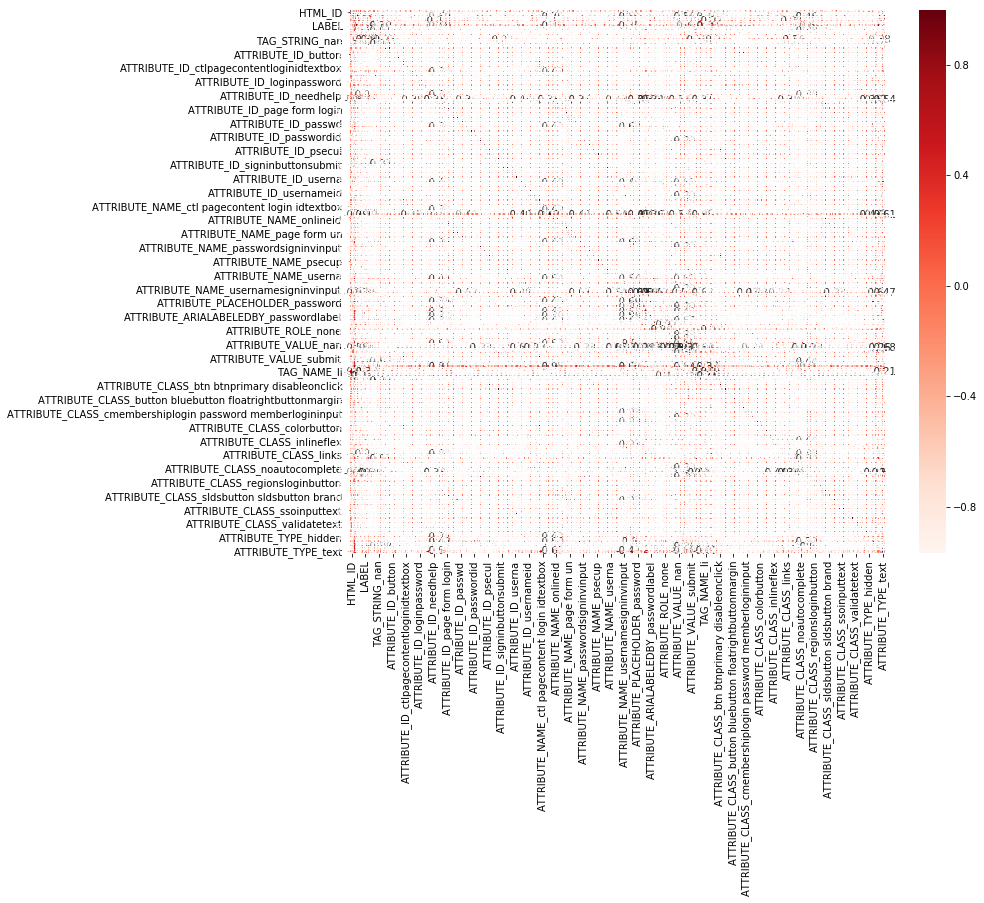

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(data_df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

Model - Fit & Predict

In [10]:
data_df.shape

(818, 119)

In [11]:
# drop irrelevant columns for model
data_df.drop(columns=['LOGIN_URL','HTML_ID'],inplace=True)

#Split data into training features and labels
X, y = data_df.loc[:, data_df.columns != 'LABEL'], data_df['LABEL']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)

Model Evaluation - 10 Fold Cross Validation

In [12]:
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 97.92% (2.44%)


Model Evaluation - Confusion Matrix

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Other','Username','Password','Submit']))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       Other       0.99      1.00      0.99       221
    Username       0.88      0.78      0.82         9
    Password       0.88      1.00      0.93         7
      Submit       1.00      0.78      0.88         9

    accuracy                           0.98       246
   macro avg       0.93      0.89      0.91       246
weighted avg       0.98      0.98      0.98       246



array([[220,   1,   0,   0],
       [  1,   7,   1,   0],
       [  0,   0,   7,   0],
       [  2,   0,   0,   7]])

Feature Importance

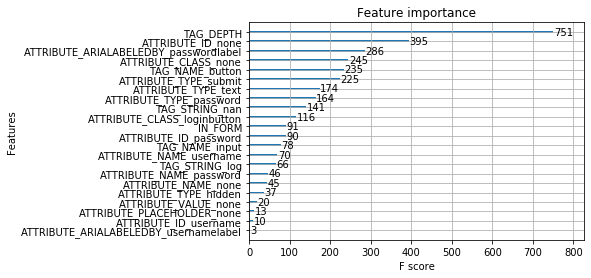

In [14]:
plot_importance(model, )